# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [4]:
df.shape

(1898, 9)

#### Observations:

After applying the `.shape` method to our dataset, we see there are 1898 rows and 9 columns.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [5]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

Applying the `.info` method to our dataset shows the number of non-null entries and data types for each column. 
We can see that this dataset consists of integer, string, and float datatypes. We also see that there is no missing information from this dataset.


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [6]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

to_cats = ['restaurant_name', 'cuisine_type', 'day_of_the_week'] #create a variable that contains the columns to change to category type
df[to_cats] = df[to_cats].astype('category') #use the to_cats variable to typecast all to the category type

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:

Typecasting the 'object' datatypes to 'category' datatypes reduces the amount of memory required to store the dataframe.
Previously the dataframe was ~134 KB. After conversion the dataframe only requires ~103 KB, nearly 30 KB difference.
This difference is relatively minor in this size dataset, but given a larger dataset, reducing size requirements can pay off.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

As expected, the order_id and customer_id are meaningless when evaluated statistically.
Based on this data, the average cost_of_the_order is slightly greater than the median, indicating a slight right-skewness of the data.
The maximum cost_of_the_order is around 35 dollars while the minimum is around 5 dollars.

Both the food_preparation_time and delivery_time appear to have normal distributions.
The longest an order has taken to be delivered is 33 minutes.


### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

736 orders were not rated. <br>
The 'Not given' group is the largest category in the ratings series. <br>
Even more interesting is the fact that there is no rating under a 3.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [9]:
df.info() #print the column names and data types here for easy reference.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


Based on the datatypes of these variables, we can select the type of univariate analysis will give us the most information.

In [10]:
df.nunique() #determine numnber of unique entries for each variable

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

Similarly, by determining the number of unique entries for each variable, this will also determine the type of univariate analysis to use. <br>
Also, determining the number of unique entries for each variable begins to hint at relationships in the data.<br>
For example, we know the total number of entries for the dataset is 1898 by looking at the `order_id` column. But by looking at the number of unique `customer_id` entries, we only see 1200. This tells us there are multiple entries by the same customers. These types of relationships can be explored more later.


Looking first at the `restaurant_name` variable, we notice there are 178 unique entries of this categorical datatype. This tells me a typical distribution or count plot won't reveal much information. <br>
<br>
So next, I'll look at the `cuisine_type`. With only 14 unique entries, this categorical variable can be explored.

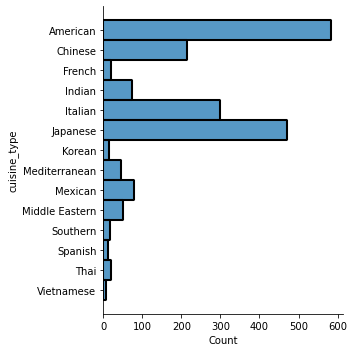

In [11]:
sns.displot(data = df, y = 'cuisine_type'); #plot the frequency of each cuisine type

From this analysis we can simply see that American and Japanese cuisine are the most frequently ordered cuisine type.<br>
Similarly, Vietnamese and Spanish cuisine are ordered the least.

Next let's look at the `cost_of_the_order` variable.

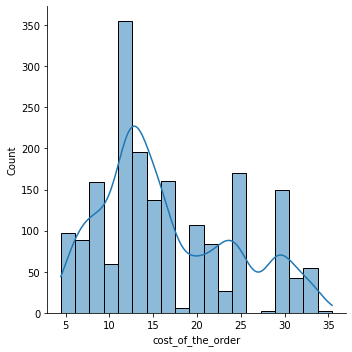

In [12]:
sns.displot(data = df, x = 'cost_of_the_order', kde = True); #plot a distribution of the order cost

The analysis on this variable shows the distribution is heavily left-skewed. This means that the majority of the orders placed cost less than the median order cost.

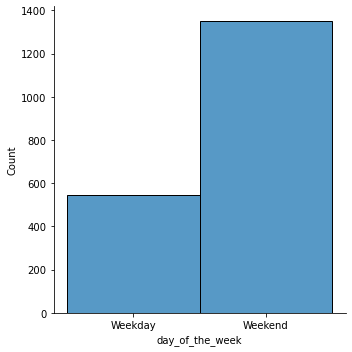

In [13]:
sns.displot(data = df, x = 'day_of_the_week'); #plot a distribution of the days orders are placed.

In [14]:
weekend_orders = df['day_of_the_week'] == 'Weekend'

weekend_count = df[weekend_orders]['order_id'].count()
total_count = df['order_id'].count()

print(weekend_count / total_count * 100)

71.18018967334035


The above analysis on `day_of_the_week` shows that the vast majority of orders are placed on the weekend.

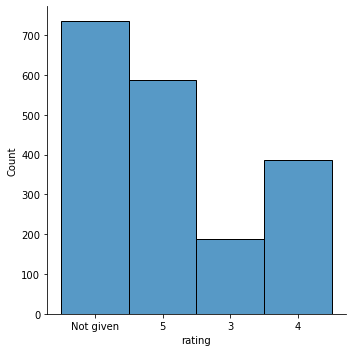

In [15]:
sns.displot(data = df, x = 'rating'); #plot distribution of count of ratings.

In [16]:
print(df[df['rating'] == 'Not given']['order_id'].count() / df['order_id'].count() * 100)


38.77766069546891


The ratings distribution shows that the majority of orders placed do not recieve a rating. However, orders that were rated do not recieve lower than a 3.

In [17]:
df.groupby(by = 'cuisine_type')['restaurant_name'].nunique()

cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64

In [18]:
order_counts = df.groupby(by = 'customer_id')['order_id'].count().reset_index()
max_order = df.groupby(by = 'customer_id')['order_id'].count().max()

ratings_counts = df.groupby(by = 'customer_id')['rating'].count().reset_index()
max_ratings = df.groupby(by = 'customer_id')['rating'].count().max()
# most_ratings = df.groupby(by = 'customer_id')['rating'].count().max()

most_orders = order_counts[order_counts['order_id'] == max_order]['customer_id']
most_ratings = order_counts[order_counts['order_id'] == max_ratings]['customer_id']

print('The customer with the most orders is', most_orders)
print('The customer with the most ratings is', most_ratings)


The customer with the most orders is 116    52832
Name: customer_id, dtype: int64
The customer with the most ratings is 116    52832
Name: customer_id, dtype: int64


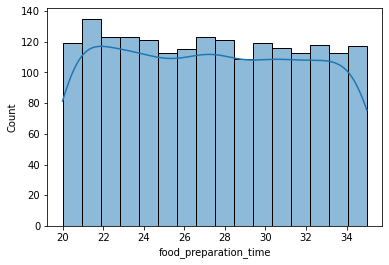

In [19]:
sns.histplot(data = df, x = 'food_preparation_time', bins = 16, kde = True); #plot distribution of food prep time. Specify number of bins to show accurate distribution. 

The analysis of `food_preparation_time` shows a very even distribution. With only 16 unique entries, this distribution plot is best represented with a defined number of bins.

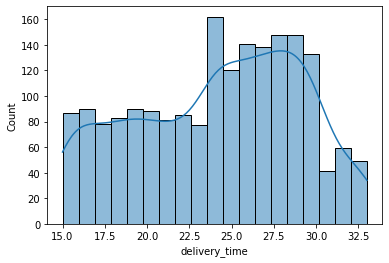

In [20]:
sns.histplot(data = df, x = 'delivery_time', bins = 19, kde = True); #plot distribution of delivery time. Specify number of bins to show accurate distribution.

Similar to the `food_preparation_time` analysis, `delivery_time` is best represented with a defined number of bins to show an accurate distribution. This analysis shows a slighly right-skewed distribution, meaning on average the delivery time is longer than the median delivery time.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [21]:
df['restaurant_name'].value_counts(ascending = False) #Count the occurences of each restaurant name and sort from highest to lowest.

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:

The restaurants that receive the highest number of orders are:
<ul>
    <li> Shake Shack </li>
    <li> The Meatball Shop </li>
    <li> Blue Ribbon Sushi </li>
    <li> Blue Ribbon Fried Chicken </li>
    <li> Parm </li>
</ul>
    


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [22]:
cond1 = df['day_of_the_week'] == 'Weekend' #create a variable to store entries where day of the week is equal to 'Weekend'.
df[cond1]['cuisine_type'].value_counts(ascending = False) #Apply above variable to df and focus on cuisine type. Count these values and sort accordingly.

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

The top 3 most popular cuisines ordered on the weekends are:
<ul>
    <li> American </li>
    <li> Japanese </li>
    <li> Italian </li>
</ul>

In [23]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [24]:
cond2 = df['cost_of_the_order'] > 20 #create a variable to store condition order greater than 20.

print('Number of orders over $20:')
print(df[cond2]['order_id'].count()) #apply the condition to the dataset and count the number of entries. Use order_id to get single value.
print('')
print('Percentage of orders that are over $20:')
print(df[cond2]['order_id'].count() / df['order_id'].count() * 100 ) #Calculate percentage of total.

Number of orders over $20:
555

Percentage of orders that are over $20:
29.24130663856691


#### Observations:

From the entire dataset, 555 orders were over 20 dollars<br>
Of the total orders, the orders over 20 dollars made up ~29.2%

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [25]:
df['delivery_time'].mean() #apply the mean method to the delivery time variable

24.161749209694417

#### Observations:

The average delivery time of the orders is ~24 minutes. 


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [26]:
cond3 = df['cost_of_the_order'].max() #create a variable to store the maximum order cost

df.loc[df['cost_of_the_order'] == cond3] #return the location where the order cost matches the condition


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:

The maximum spent on any order was by customer 62359 and they spent 35.41 on Mediterranean from the restaurant Pylos on a weekday. 

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [27]:
df.info() #I like to print this to remind myself of the variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


<AxesSubplot:>

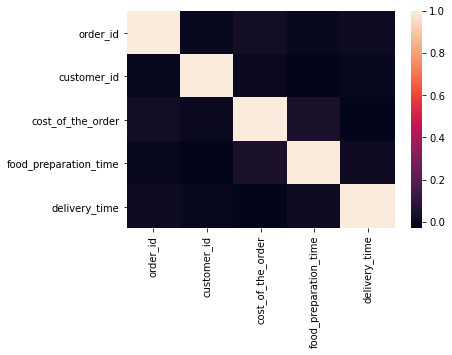

In [28]:
sns.heatmap(df.corr()) #call the .corr method inside the heatmap to explore correlation between numerical variables.


Look at the correlation analysis, we find no strong correlation between any of the numberical variables.<br>
This makes makes sense for the time variables and id variables because they are independent. 
Because there is no correlation between these variables, exploring these relationships will not yield any insights.

Next, lets incorporate some of the categorical variables into this.

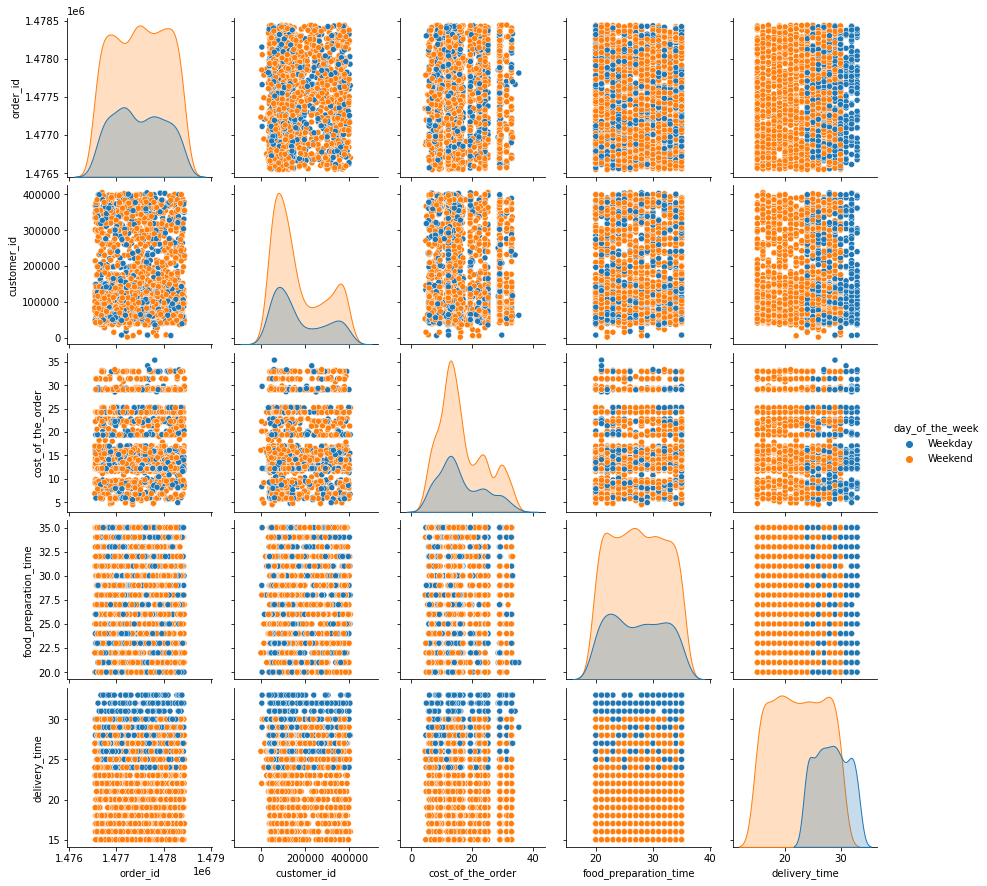

In [29]:
sns.pairplot(df, hue = 'day_of_the_week'); #plot the correlation of numeric variables with respect to day of the week. 

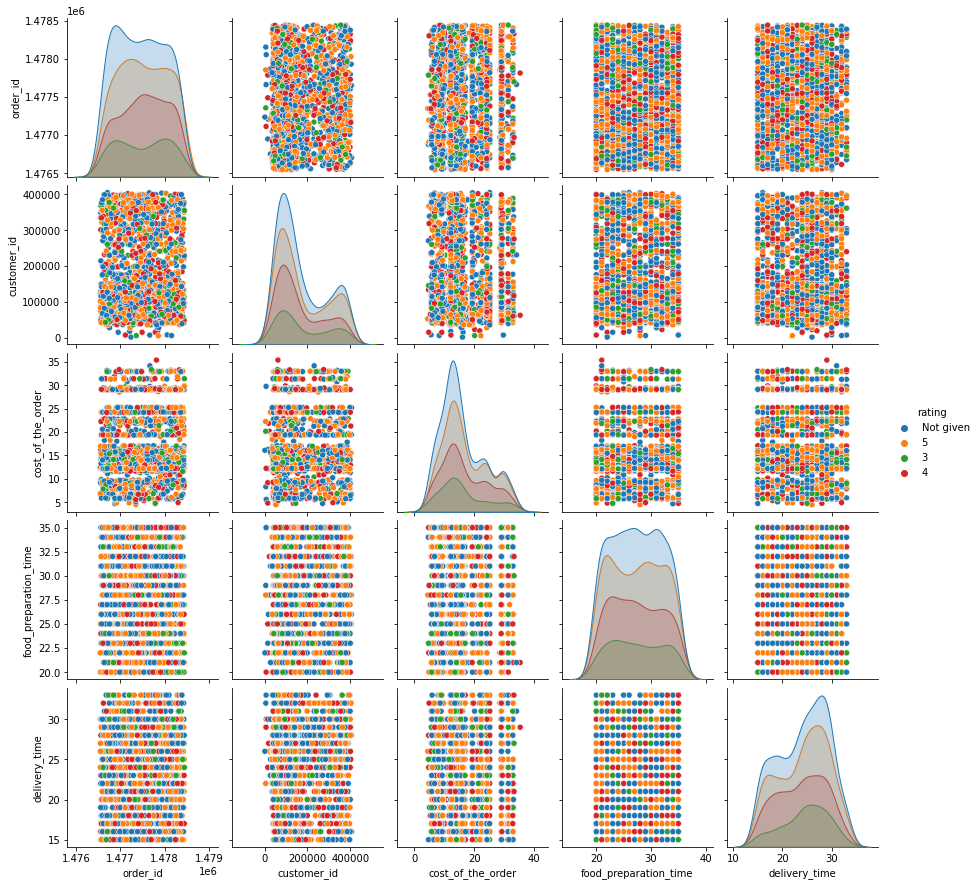

In [30]:
sns.pairplot(df, hue = 'rating'); #plot the correlation of numeric variables with respect to rating

### Cost Of the Order Analysis

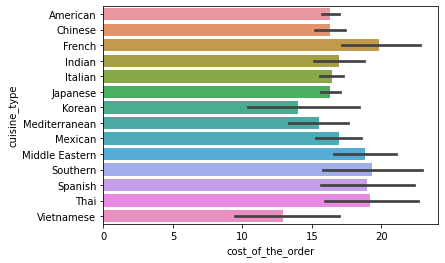

In [31]:
sns.barplot(data = df, x = 'cost_of_the_order', y = 'cuisine_type'); #plot the cost of the order against the cuisine type

This analysis can be helpful to get a rough estimate of the differing costs based on cuisine type. However, this graph is not helpful to find the actual order of these cuisine types since many of the entries are very closely grouped.

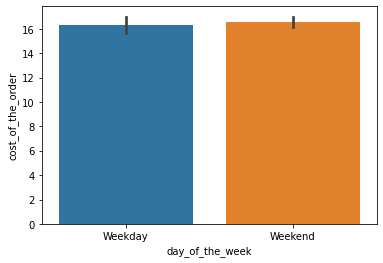

In [32]:
sns.barplot(data = df, y = 'cost_of_the_order', x = 'day_of_the_week'); #plot the cost of the order agaisnt the day of the week.

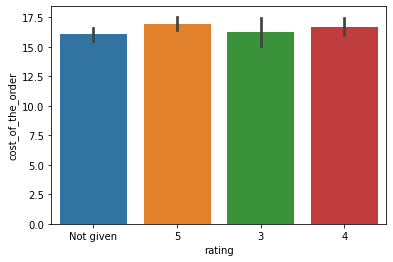

In [33]:
sns.barplot(data = df, x = 'rating', y = 'cost_of_the_order'); #plot the cost of the order against the rating

The above graphs compare the `cost_of_the_order` variable with the categorical variables `cuisine_type`, `day_of_the_week`, and `rating`.<br>
What we see when looking at these graphs is the a breakdown of which cuisine type costs the most (see notes on this above), but also that the cost of the order is not influenced by weekday vs. weekend and the rating of the order is independent of the cost. 

### Food Preparation Time Analysis

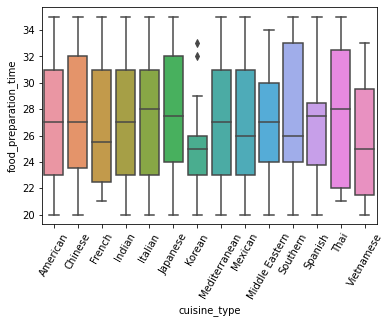

In [47]:
sns.boxplot(data = df, y = 'food_preparation_time', x = 'cuisine_type');
plt.xticks(rotation = 60)
plt.show()#plot the prep time against the cuisine type

Similar to the `cost_of_the_order` analysis, the analysis `food_preparation_time` vs. `cuisine_type` is not easily discernable from a graph like this. 

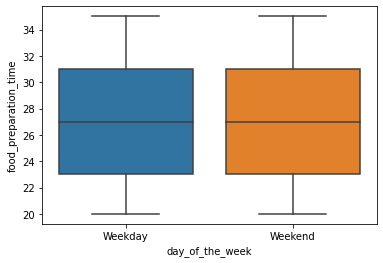

In [48]:
sns.boxplot(data = df, y = 'food_preparation_time', x = 'day_of_the_week'); #plot the prep time against the day of the week

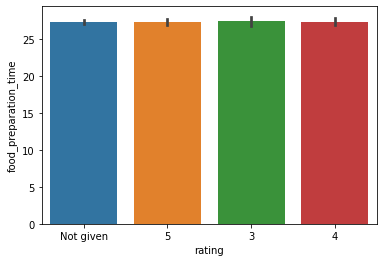

In [36]:
sns.barplot(data = df, x = 'rating', y = 'food_preparation_time'); #plot the prep time against the rating

Based on the analysis of `food_preparation_time`, we find that there is no strong relationship between this variable and the categorical variables other than `cuisine_type`. 

### Delivery Time Analysis

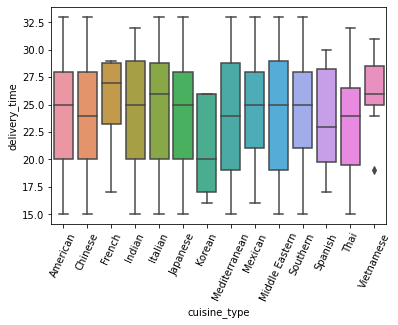

In [51]:
sns.boxplot(data = df, y = 'delivery_time', x = 'cuisine_type');
plt.xticks(rotation = 65)
plt.show()#plot the delivery time against the cuisine type

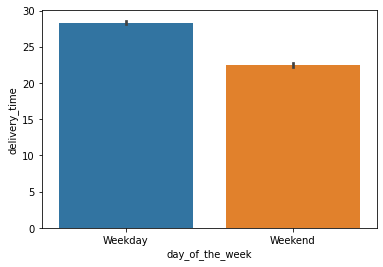

In [38]:
sns.barplot(data = df, x = 'day_of_the_week', y = 'delivery_time'); #plot the delivery time against the day of the week

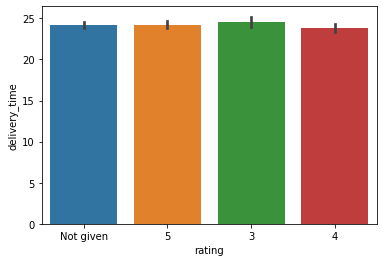

In [39]:
sns.barplot(data = df, x = 'rating', y = 'delivery_time'); #plot the delivery time against the rating

Based on the above analysis, the only striking insight is the delivery time is longer during the week than on weekends.

### Categorical Comparisons

In [40]:
pd.crosstab(df['rating'], df['day_of_the_week'])

day_of_the_week,Weekday,Weekend
rating,,
3,63,125
4,109,277
5,168,420
Not given,207,529


### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [41]:
#create a copy of the data frame
df1 = df.copy()

#convert the 'rating' series to a string
df1['rating'] = df['rating'].astype(str)

#get rid of all entries where the rating is not given
df1 = df1[df1['rating'] != 'Not given']

#convert the 'rating' series into an integer
df1['rating'] = df1['rating'].astype(int)

#create a new dataframe that contains the number of ratings per restaurant
rate_counts = df1.groupby(by = 'restaurant_name')['rating'].count().reset_index()

#add a new column to the dataframe that creates an average of the ratings
rate_counts['average'] = df1.groupby(by = 'restaurant_name')['rating'].mean().reset_index(drop = True)

#create a loop that iterates through all entries in our dataframe
for i in range(len(rate_counts)): #iterate through the length of the list
     if rate_counts.loc[i]['rating'] > 50: #condition if there are more than 50 ratings
            if rate_counts.loc[i]['average'] > 4: #condition if the average rating is greater than 4
                print(rate_counts.loc[i]['restaurant_name']) #print restaurant's name

Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop


#### Observations:

4 restaurants fit the criteria for the promotion:
<ul>
    <li>Blue Ribbon Fried Chicken</li>
    <li>Blue Ribbon Sushi</li>
    <li>Shake Shack</li>
    <li>The Meatball Shop</li>
</ul>

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [42]:
net_revenue = 0 #initialize variable

for i in range(len(df)): #start loop for each index in the dataframe
    cost = df.loc[i]['cost_of_the_order'] #create a cost variable to cut down on typing it over and over
    
    if cost > 20: #start if loop
        net_revenue = net_revenue + (cost * 0.25) #25% revenue added
    elif 20 > cost > 5:
        net_revenue = net_revenue + (cost * 0.15) #15% revenue added
    
print(net_revenue) #print final result


6166.302999999994


#### Observations:

From the given dataset, the net revenue generated was 6166 dollars.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [43]:
#Create a new column in our dataframe that adds the delivery time and prep time
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

#Create a condition variable with the conditions we're looking for
hour_time = df['total_time'] > 60

#Find the number of instances that meet our condition
over_hour_count = df[hour_time]['order_id'].count()

#Find the total count in our dataset
total_count = df['order_id'].count()

#Calculate the percentage
percentage = over_hour_count / total_count * 100

#Print the result
print(percentage)

10.537407797681771


#### Observations:

Just over 10.5% of orders placed take over 1 hour total to be delivered.


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [44]:
# Create condition variables for day of the week
weekend = df['day_of_the_week'] == 'Weekend' 
weekday = df['day_of_the_week'] == 'Weekday' 

#Use the condition variables to observe the delivery time and find the average
weekend_average = df[weekend]['delivery_time'].mean()
weekday_average = df[weekday]['delivery_time'].mean()

#Print the results
print(weekend_average, weekday_average)

22.4700222057735 28.340036563071298


#### Observations:

On average, the delivery time is longer during the weekdays than on the weekends.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights:

<ul>
    <li> 70% of all orders are 20 dollars or less.</li>
    <li> 90% of all orders are fulfilled within an hour.</li>
    <li> Delivery time is longer on the weekdays.</li>
    <li> 71% of orders are placed on the weekend.</li>
    <li> American Cuisine is the most popular cuisine type but also has the highest count of restaurants in the set. </li>
    <li> 39% of orders do not leave a rating. </li>
    <li> Customer 52832 has placed the most orders (13) and left a rating each time. </li>
</ul>

#### Recommendations:

First, in order to enhance the customer experience, we need to understand how the customer feels. With 40% of the customers leaving no rating, it is hard to determine which variables impact the customer experience. My first recommendation is to incentivize the customers to leave a rating on each order they place. 

Second, the majority of orders are placed on the weekend. In order to increase number of orders during the week, provide incentives during the non-peak times. 

Finally, the most popular cuisine types are American, Chinese, Japanese, and Italian. Based on this, my recommendation is to approach other restaurants in the vicinity that specialize in these cuisine types and encourage them or even incentivize them to use the FoodHub service. 
Armed with this data, it is likely that the demand would be strong and both businesses will grow.